# Physical activity monitoring project 

**Project enviroment**

requiments_pam.txt


In [2]:
# Log in to your W&B account
import wandb
import random
import math
import os
import pandas as pd
import numpy as np

wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\malit\_netrc
wandb: Currently logged in as: malithjkd (springleafy) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# wandb testing

In [3]:
import random
import math

# Launch 5 simulated experiments
total_runs = 5
for run in range(total_runs):
  # 1️. Start a new run to track this script
  wandb.init(
      # Set the project where this run will be logged
      project="basic-intro",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"experiment_{run}",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.02,
      "architecture": "CNN",
      "dataset": "CIFAR-100",
      "epochs": 10,
      })

  # This simple block simulates a training loop logging metrics
  epochs = 10
  offset = random.random() / 5
  for epoch in range(2, epochs):
      acc = 1 - 2 ** -epoch - random.random() / epoch - offset
      loss = 2 ** -epoch + random.random() / epoch + offset

      # 2️. Log metrics from your script to W&B
      wandb.log({"acc": acc, "loss": loss})

  # Mark the run as finished
  wandb.finish()

acc,▁▄▇▆▆▇▇█
loss,█▅▃▂▂▂▁▁
acc,0.8099
loss,0.17628


acc,▁▂▆█▆▇██
loss,█▃▃▃▃▂▁▁
acc,0.79052
loss,0.19302


acc,▁▃▄▇▆███
loss,█▄▃▃▂▁▂▁
acc,0.7248
loss,0.27919


acc,▁▁▄▅▇█▇█
loss,▇█▆▁▁▁▂▂
acc,0.98829
loss,0.09387


acc,▁▆▇▅▇█▇▇
loss,█▄▄▂▂▂▂▁
acc,0.88689
loss,0.04787


---

# Open data and reating data

In [ ]:

# Define the path to your file
file_path = r"C:\Users\mj.j\Documents\AI_ML_data\PAMAP2_Dataset\Protocol\subject102.dat"

# Load the data, specifying the separator and that there's no header
# The 'engine='python'' argument can sometimes help with non-standard files.
df = pd.read_csv(file_path, sep='\s+', header=None, engine='python')

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mj.j\AppData\Local\Temp\ipykernel_12492\24508568.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None, engine='python')


In [86]:
column_names = [
    "timestamp",
    "activity_id",
    "heart_rate",
    # IMU Hand
    "hand_temp",
    "hand_acc_16g_x", "hand_acc_16g_y", "hand_acc_16g_z",
    "hand_acc_6g_x", "hand_acc_6g_y", "hand_acc_6g_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "hand_orient_1", "hand_orient_2", "hand_orient_3", "hand_orient_4",
    # IMU Chest
    "chest_temp",
    "chest_acc_16g_x", "chest_acc_16g_y", "chest_acc_16g_z",
    "chest_acc_6g_x", "chest_acc_6g_y", "chest_acc_6g_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "chest_orient_1", "chest_orient_2", "chest_orient_3", "chest_orient_4",
    # IMU Ankle
    "ankle_temp",
    "ankle_acc_16g_x", "ankle_acc_16g_y", "ankle_acc_16g_z",
    "ankle_acc_6g_x", "ankle_acc_6g_y", "ankle_acc_6g_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
    "ankle_orient_1", "ankle_orient_2", "ankle_orient_3", "ankle_orient_4"
]

In [87]:
print("Dataframe shape:", df.shape)
print("Number of columns in dataframe:", len(df.columns))
print("Number of features in header list:", len(column_names))

Dataframe shape: (376417, 54)
Number of columns in dataframe: 54
Number of features in header list: 54


In [88]:
# add the column names to the dataframe
df.columns = column_names

print(df.head())

   timestamp  activity_id  heart_rate  hand_temp  hand_acc_16g_x  \
0       8.38            0       104.0       30.0         2.37223   
1       8.39            0         NaN       30.0         2.18837   
2       8.40            0         NaN       30.0         2.37357   
3       8.41            0         NaN       30.0         2.07473   
4       8.42            0         NaN       30.0         2.22936   

   hand_acc_16g_y  hand_acc_16g_z  hand_acc_6g_x  hand_acc_6g_y  \
0         8.60074         3.51048        2.43954        8.76165   
1         8.56560         3.66179        2.39494        8.55081   
2         8.60107         3.54898        2.30514        8.53644   
3         8.52853         3.66021        2.33528        8.53622   
4         8.83122         3.70000        2.23055        8.59741   

   hand_acc_6g_z  ...  ankle_gyro_x  ankle_gyro_y  ankle_gyro_z  ankle_mag_x  \
0        3.35465  ...      0.008300      0.009250     -0.017580     -61.1888   
1        3.64207  ...     -0

In [ ]:
# column heart_rate has few empty values we need to fill it up
# The first few values might still be NaN if the series starts with NaNs. 
# We can backfill them from the first valid observation.
df['heart_rate'] = df['heart_rate'].fillna(method='ffill').fillna(method='bfill')

C:\Users\mj.j\AppData\Local\Temp\ipykernel_12492\3297342967.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['heart_rate'] = df['heart_rate'].fillna(method='ffill').fillna(method='bfill')


In [90]:
print(df.head())

   timestamp  activity_id  heart_rate  hand_temp  hand_acc_16g_x  \
0       8.38            0       104.0       30.0         2.37223   
1       8.39            0       104.0       30.0         2.18837   
2       8.40            0       104.0       30.0         2.37357   
3       8.41            0       104.0       30.0         2.07473   
4       8.42            0       104.0       30.0         2.22936   

   hand_acc_16g_y  hand_acc_16g_z  hand_acc_6g_x  hand_acc_6g_y  \
0         8.60074         3.51048        2.43954        8.76165   
1         8.56560         3.66179        2.39494        8.55081   
2         8.60107         3.54898        2.30514        8.53644   
3         8.52853         3.66021        2.33528        8.53622   
4         8.83122         3.70000        2.23055        8.59741   

   hand_acc_6g_z  ...  ankle_gyro_x  ankle_gyro_y  ankle_gyro_z  ankle_mag_x  \
0        3.35465  ...      0.008300      0.009250     -0.017580     -61.1888   
1        3.64207  ...     -0

In [91]:
numpy_array = df.to_numpy()

In [92]:
# Print the shape and the first 5 rows of the new array
print("Shape of the NumPy array:", numpy_array.shape)
print("First 5 rows of the NumPy array:")
print(numpy_array[:5])

Shape of the NumPy array: (376417, 54)
First 5 rows of the NumPy array:
[[ 8.38000e+00  0.00000e+00  1.04000e+02  3.00000e+01  2.37223e+00
   8.60074e+00  3.51048e+00  2.43954e+00  8.76165e+00  3.35465e+00
  -9.22174e-02  5.68115e-02 -1.58445e-02  1.46806e+01 -6.92128e+01
  -5.58905e+00  1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   3.18125e+01  2.38080e-01  9.80003e+00 -1.68896e+00  2.65304e-01
   9.81549e+00 -1.41344e+00 -5.06495e-03 -6.78097e-03 -5.66295e-03
   4.71960e-01 -5.10499e+01  4.32903e+01  1.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  3.03125e+01  9.65918e+00 -1.65569e+00
  -9.97967e-02  9.64689e+00 -1.55576e+00  3.10404e-01  8.30026e-03
   9.25038e-03 -1.75803e-02 -6.11888e+01 -3.89599e+01 -5.81438e+01
   1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 8.39000e+00  0.00000e+00  1.04000e+02  3.00000e+01  2.18837e+00
   8.56560e+00  3.66179e+00  2.39494e+00  8.55081e+00  3.64207e+00
  -2.44132e-02  4.77585e-02  6.47434e-03  1.48991e+01 -6.92224e+01
  

In [93]:
import gc

# Remove the DataFrame from memory
del df

# Optionally, run the garbage collector to free up memory immediately
gc.collect()

print("DataFrame 'df' has been deleted.")

# =================================
# # Remove the NumPy array from memory
# del numpy_array
# 
# # Optionally, run the garbage collector to free up memory immediately
# gc.collect()
# 
# print("NumPy array 'numpy_array' has been deleted.")



DataFrame 'df' has been deleted.


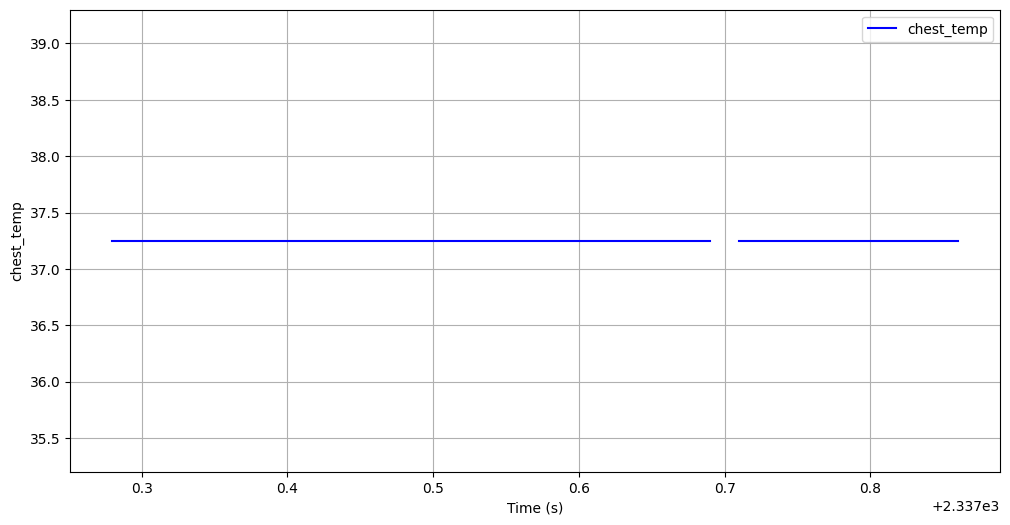

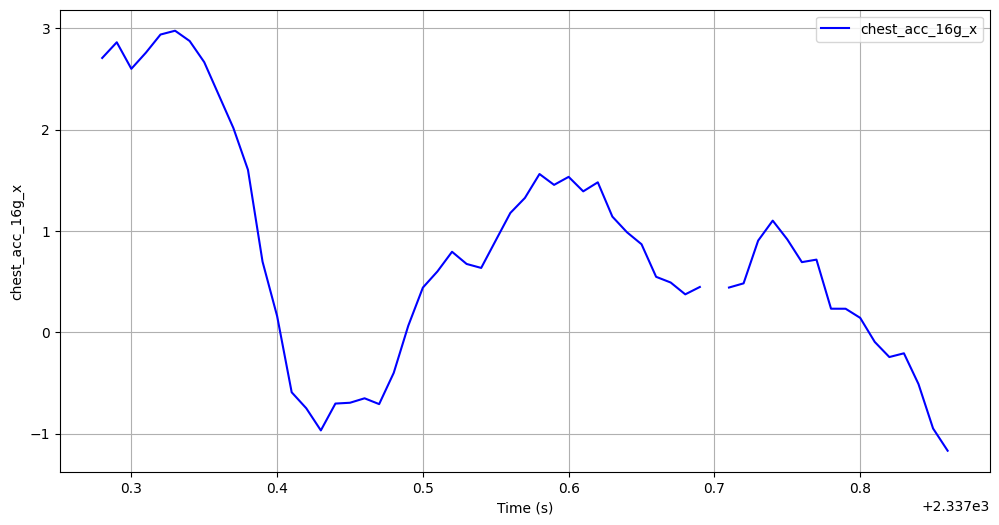

In [95]:
# plot the first 1000 samples of the heart rate
import matplotlib.pyplot as plt
import numpy as np

for i in range(20,22,1):  
    plot_column_no = i  # heart rate column index

    time = numpy_array[232889:232949, 0]  # first column is the timestamp
    heart_rate = numpy_array[232889:232949, plot_column_no]  

    plt.figure(figsize=(12, 6))
    plt.plot(time, heart_rate, label= column_names[plot_column_no], color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel(column_names[plot_column_no])

    plt.legend()
    plt.grid()
    plt.savefig(f'C:\\Users\\mj.j\\Documents\\AI_ML_data\\pamap2_dataset_plot\\column_{plot_column_no}_{column_names[plot_column_no]}.png')
    plt.show()




---

# Removing nan

In [ ]:
# display first 10 rows of the timestamp column with activity_id = 1
activity_id = 1 # lying

sensor_id = 2 # timestamp column


activity_array = numpy_array[numpy_array[:, 1] == activity_id]
print(activity_array.shape)
print(activity_array[34:134, 2])


# get mean values of  next 20 columns and skip nan values
mean_values = []


print(activity_array[:20, 2])

for i in range(1, 50, 1):    
    col_data = activity_array[i, 2] 
    if activity_array[i, 2] > 0:
        print(activity_array[i, 2],i)



(27187, 54)
[ nan  nan  nan 100.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
 101.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 101.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan 101.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan 101.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan 101.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 101.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 101.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan 101.  nan  nan  nan  nan  nan  nan
  nan  nan]
[ nan  nan  nan  nan 100.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan 100.  nan  nan  nan  nan]
100.0 4
100.0 15
100.0 26
100.0 37
101.0 48


In [61]:
print(numpy_array.shape)

(376417, 54)


In [68]:
nan_columns = np.isnan(numpy_array).any(axis=0)

print("Columns containing NaN values:")
for i, has_nan in enumerate(nan_columns):
    if has_nan:
        print(f"Column index {i}: {column_names[i]}")

Columns containing NaN values:


Column index 2: heart_rate
Column index 3: hand_temp
Column index 4: hand_acc_16g_x
Column index 5: hand_acc_16g_y
Column index 6: hand_acc_16g_z
Column index 7: hand_acc_6g_x
Column index 8: hand_acc_6g_y
Column index 9: hand_acc_6g_z
Column index 10: hand_gyro_x
Column index 11: hand_gyro_y
Column index 12: hand_gyro_z
Column index 13: hand_mag_x
Column index 14: hand_mag_y
Column index 15: hand_mag_z
Column index 16: hand_orient_1
Column index 17: hand_orient_2
Column index 18: hand_orient_3
Column index 19: hand_orient_4
Column index 20: chest_temp
Column index 21: chest_acc_16g_x
Column index 22: chest_acc_16g_y
Column index 23: chest_acc_16g_z
Column index 24: chest_acc_6g_x
Column index 25: chest_acc_6g_y
Column index 26: chest_acc_6g_z
Column index 27: chest_gyro_x
Column index 28: chest_gyro_y
Column index 29: chest_gyro_z
Column index 30: chest_mag_x
Column index 31: chest_mag_y
Column index 32: chest_mag_z
Column index 33: chest_orient_1
Column index 34: chest_orient_2
Colum

In [71]:
# This assumes 'numpy_array' and 'column_names' are already defined.

# Iterate over each column index
for i in range(numpy_array.shape[1]):
    # Find the row indices where the value is NaN in the current column
    nan_rows = np.where(np.isnan(numpy_array[:, i]))[0]
    
    # If any NaN values were found in the column, print the details
    if len(nan_rows) > 0:
        print(f"Column {i} ({column_names[i]}) has NaN values at the following row indices:")
        print(nan_rows)
        print("-" * 30) # Add a separator for bette

Column 2 (heart_rate) has NaN values at the following row indices:
[     1      2      3 ... 376414 376415 376416]
------------------------------
Column 3 (hand_temp) has NaN values at the following row indices:
[ 19193  19194  19195 ... 368058 375724 375725]
------------------------------
Column 4 (hand_acc_16g_x) has NaN values at the following row indices:
[ 19193  19194  19195 ... 368058 375724 375725]
------------------------------
Column 5 (hand_acc_16g_y) has NaN values at the following row indices:
[ 19193  19194  19195 ... 368058 375724 375725]
------------------------------
Column 6 (hand_acc_16g_z) has NaN values at the following row indices:
[ 19193  19194  19195 ... 368058 375724 375725]
------------------------------
Column 7 (hand_acc_6g_x) has NaN values at the following row indices:
[ 19193  19194  19195 ... 368058 375724 375725]
------------------------------
Column 8 (hand_acc_6g_y) has NaN values at the following row indices:
[ 19193  19194  19195 ... 368058 375724 

In [96]:
# This assumes 'numpy_array' and 'column_names' are already defined.
nan_counts = np.isnan(numpy_array).sum(axis=0)

print("Number of NaN values in each column:")
for i, count in enumerate(nan_counts):
    if count > 0:
        print(f"Column index {i} ({column_names[i]}): {count} NaN values")

Number of NaN values in each column:
Column index 3 (hand_temp): 1454 NaN values
Column index 4 (hand_acc_16g_x): 1454 NaN values
Column index 5 (hand_acc_16g_y): 1454 NaN values
Column index 6 (hand_acc_16g_z): 1454 NaN values
Column index 7 (hand_acc_6g_x): 1454 NaN values
Column index 8 (hand_acc_6g_y): 1454 NaN values
Column index 9 (hand_acc_6g_z): 1454 NaN values
Column index 10 (hand_gyro_x): 1454 NaN values
Column index 11 (hand_gyro_y): 1454 NaN values
Column index 12 (hand_gyro_z): 1454 NaN values
Column index 13 (hand_mag_x): 1454 NaN values
Column index 14 (hand_mag_y): 1454 NaN values
Column index 15 (hand_mag_z): 1454 NaN values
Column index 16 (hand_orient_1): 1454 NaN values
Column index 17 (hand_orient_2): 1454 NaN values
Column index 18 (hand_orient_3): 1454 NaN values
Column index 19 (hand_orient_4): 1454 NaN values
Column index 20 (chest_temp): 509 NaN values
Column index 21 (chest_acc_16g_x): 509 NaN values
Column index 22 (chest_acc_16g_y): 509 NaN values
Column i

In [97]:
# Remove rows that contain any NaN values
numpy_array = numpy_array[~np.isnan(numpy_array).any(axis=1)]

In [ ]:
# This assumes 'numpy_array' and 'column_names' are already defined.
nan_counts = np.isnan(numpy_array).sum(axis=0)

print("Number of NaN values in each column:")
for i, count in enumerate(nan_counts):
    if count > 0:
        print(f"Column index {i} ({column_names[i]}): {count} NaN values")


Number of NaN values in each column:


all the values are removed and ready to save as nan valued removed dataset 

C:\Users\mj.j\Documents\AI_ML_data\PAMAP2_Dataset\protocol_data_v1\subject101.dat


# Remove nan values save numpy_array to csv file with same file name

In [19]:
# Define the path to your file

file_name = r"subject109.dat"

folder_path = r"C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\Optional"
file_path = os.path.join(folder_path, file_name)
print(file_path)

# Load the data, specifying the separator and that there's no header
# The 'engine='python'' argument can sometimes help with non-standard files.
df = pd.read_csv(file_path, sep='\s+', header=None, engine='python')

# create headers
column_names = [
    "timestamp",
    "activity_id",
    "heart_rate",
    # IMU Hand
    "hand_temp",
    "hand_acc_16g_x", "hand_acc_16g_y", "hand_acc_16g_z",
    "hand_acc_6g_x", "hand_acc_6g_y", "hand_acc_6g_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "hand_orient_1", "hand_orient_2", "hand_orient_3", "hand_orient_4",
    # IMU Chest
    "chest_temp",
    "chest_acc_16g_x", "chest_acc_16g_y", "chest_acc_16g_z",
    "chest_acc_6g_x", "chest_acc_6g_y", "chest_acc_6g_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "chest_orient_1", "chest_orient_2", "chest_orient_3", "chest_orient_4",
    # IMU Ankle
    "ankle_temp",
    "ankle_acc_16g_x", "ankle_acc_16g_y", "ankle_acc_16g_z",
    "ankle_acc_6g_x", "ankle_acc_6g_y", "ankle_acc_6g_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
    "ankle_orient_1", "ankle_orient_2", "ankle_orient_3", "ankle_orient_4"
]

# add the column names to the dataframe
df.columns = column_names


# column heart_rate has few empty values we need to fill it up
# The first few values might still be NaN if the series starts with NaNs. 
# We can backfill them from the first valid observation.
df['heart_rate'] = df['heart_rate'].fillna(method='ffill').fillna(method='bfill')

# convert dataframe to numpy array
numpy_array = df.to_numpy()
print("shape before removing NaNs:",numpy_array.shape)

# Remove rows that contain any NaN values
numpy_array = numpy_array[~np.isnan(numpy_array).any(axis=1)]
print("shape after removing NaNs:",numpy_array.shape)


# print nan values in each column
nan_counts = np.isnan(numpy_array).sum(axis=0)

# check for nan values in each column - not needed as all nan values are removed
# print("Number of NaN values in each column:")
# for i, count in enumerate(nan_counts):
#     if count > 0:
#         print(f"Column index {i} ({column_names[i]}): {count} NaN values")



# get data file name and file path from file_name variable
file_name = file_path.split('\\')[-1]
# remove .dat extension and add .csv
file_name = file_name.replace('.dat', '.csv')

# save the new file to a new folder
new_folder_path = r"C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\Optional_data_v1"
new_full_path = os.path.join(new_folder_path, file_name)
print(new_full_path)

# save numpy_array to csv file with same file name
np.savetxt(new_full_path, numpy_array, delimiter=",", fmt='%.6f')
print(f"File saved to {new_full_path}")

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\malit\AppData\Local\Temp\ipykernel_10980\2287987456.py:11: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None, engine='python')


C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\Optional\subject109.dat


C:\Users\malit\AppData\Local\Temp\ipykernel_10980\2287987456.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['heart_rate'] = df['heart_rate'].fillna(method='ffill').fillna(method='bfill')


shape before removing NaNs: (193472, 54)
shape after removing NaNs: (192507, 54)
C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\Optional_data_v1\subject109.csv
File saved to C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\Optional_data_v1\subject109.csv
